# SD212: Graph mining
## Lab 4: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [2]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph, svg_dendrogram

In [3]:
cut_straight?

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a small graph with ground-truth clusters.

In [5]:
dataset = karate_club(True)

In [6]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

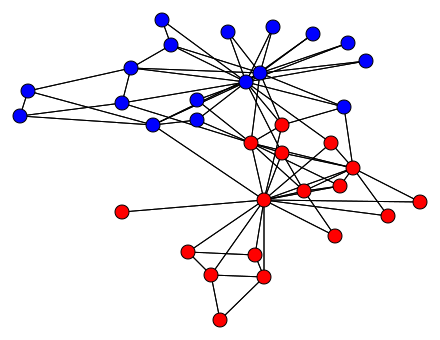

In [7]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the correspondding clustering.
* How many clusters are there at depth 2?

In [26]:
louvain = LouvainIteration()

In [27]:
dendrogram = louvain.fit_predict(adjacency)

In [28]:
dendrogram.shape

(33, 4)

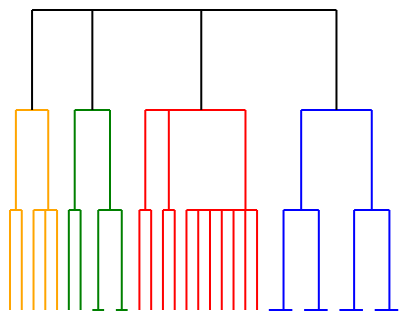

In [29]:
image = svg_dendrogram(dendrogram)
SVG(image)

There are 4 clusters at depth 1, 9 clusters at depth 2

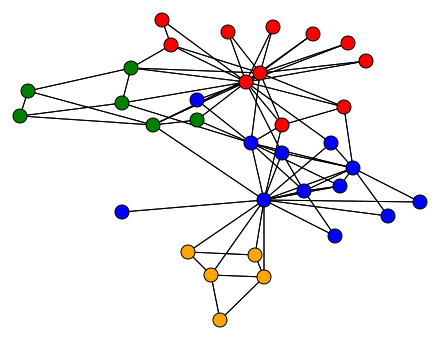

In [30]:
labels_louvain = cut_straight(dendrogram, n_clusters=2)
image = svg_graph(adjacency, position, labels=labels_louvain)
SVG(image)

In [1]:
cut_straight?

Object `cut_straight` not found.


## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain. 
* Display the corresponding aggregate dendrogram. **Hint:** Check the parameters of the function ``cut_straight``

In [31]:
paris = Paris()

In [32]:
dendrogram = paris.fit_predict(adjacency)

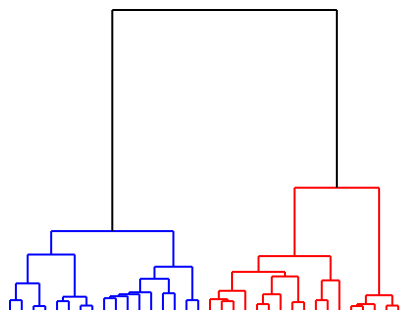

In [33]:
image = svg_dendrogram(dendrogram)
SVG(image)

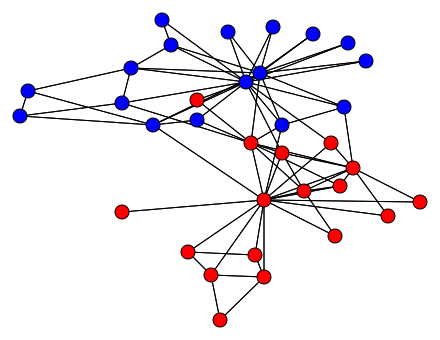

In [34]:
labels = cut_straight(dendrogram, n_clusters=2)
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [24]:
sum(labels!=labels_true)

2

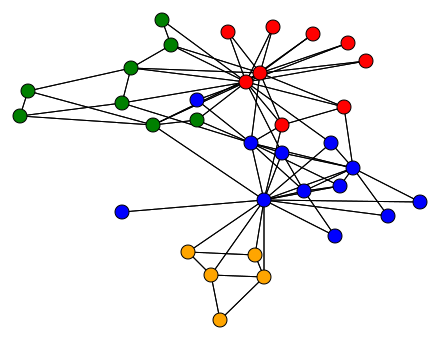

In [35]:
labels_paris = cut_straight(dendrogram, n_clusters=4)
image = svg_graph(adjacency, position, labels=labels_paris)
SVG(image)

In [36]:
sum(labels_paris!=labels_louvain)

2

## Openflights


In [73]:
dataset = openflights

In [74]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

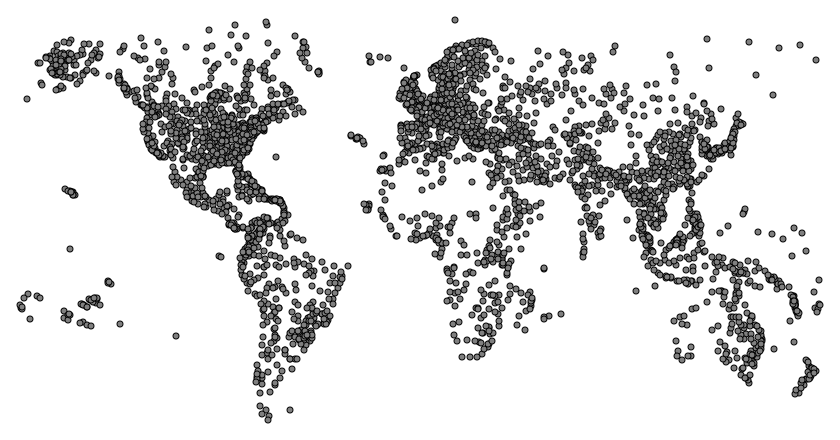

In [75]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Check the parameters of the function ``svg_dendrogram`` for better visualization.

In [80]:
dendrogram = Paris().fit_predict(adjacency)

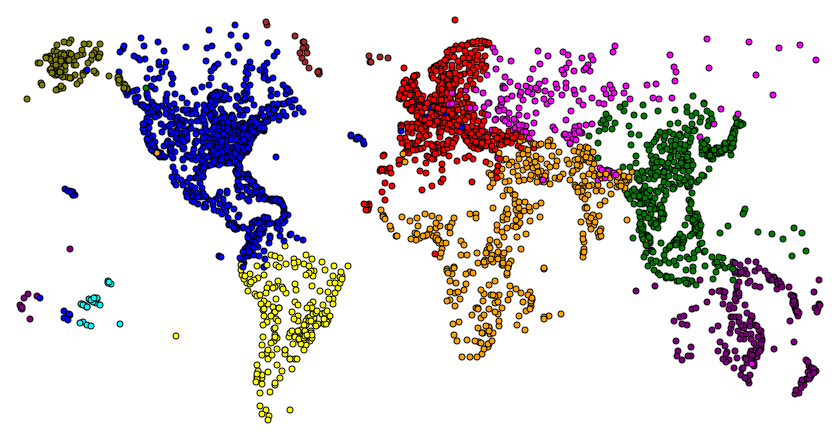

In [81]:
labels = cut_straight(dendrogram, n_clusters=10)
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False, labels=labels)
SVG(image)

In [111]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=40, return_dendrogram=True)

In [101]:
cut_straight?

In [89]:
adjacency.shape

(3097, 3097)

In [88]:
dendrogram.shape

(3096, 4)

In [59]:
adjacency.shape

(3097, 3097)

In [62]:
np.sum(adjacency, axis=1)

matrix([[ 5, 10, 18, ...,  2,  3,  1]], dtype=int64)

In [ ]:
adj = adjacency>0
traffic = np.sum(adj, axis=0) + np.sum(adj, axis=1).flatten()
for i in range(40):
    

In [121]:
svg_dendrogram?

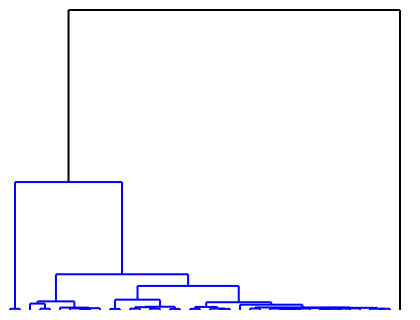

In [118]:
image = svg_dendrogram(dendrogram_aggregate)
SVG(image)

## 2. Directed graphs

## Wikipedia Vitals

In [133]:
dataset = wikivitals

In [134]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster (in terms of Personalized PageRank).

**Hint:** Use Personalized PageRank to get the top article(s) of a cluster.

In [135]:
dendrogram = Paris().fit_predict(adjacency)

In [136]:
labels = cut_straight(dendrogram, n_clusters=40)

In [138]:
scores = PageRank().fit_predict(adjacency)

In [145]:
for i in range(40):
    airports = names[labels==i]
    top = top_k(scores[labels==i], k=5)
    print('\nTop 5 articles of cluster', i+1)
    for j, node in enumerate(top):
        print(j+1, airports[node])


Top 5 articles of cluster 1
1 The New York Times
2 Encyclopædia Britannica
3 The Washington Post
4 Time (magazine)
5 BBC

Top 5 articles of cluster 2
1 Taxonomy (biology)
2 Animal
3 Mammal
4 Species
5 Jurassic

Top 5 articles of cluster 3
1 Evolution
2 Protein
3 Plant
4 DNA
5 Biology

Top 5 articles of cluster 4
1 Bacteria
2 World Health Organization
3 Temperature
4 Tuberculosis
5 Noam Chomsky

Top 5 articles of cluster 5
1 Atlantic Ocean
2 Water
3 Precipitation
4 Energy
5 Drainage basin

Top 5 articles of cluster 6
1 Physics
2 Kelvin
3 Density
4 Albert Einstein
5 Quantum mechanics

Top 5 articles of cluster 7
1 Catholic Church
2 Christianity
3 Israel
4 Judaism
5 Protestantism

Top 5 articles of cluster 8
1 Iron
2 Hydrogen
3 Carbon dioxide
4 Oxygen
5 Copper

Top 5 articles of cluster 9
1 Confucianism
2 Immanuel Kant
3 Age of Enlightenment
4 Isaac Newton
5 Napoleon

Top 5 articles of cluster 10
1 Egypt
2 Islam
3 Iran
4 Ancient Egypt
5 Syria

Top 5 articles of cluster 11
1 Great Depress

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [ ]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes. 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
    
    return cluster_nested